In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from imblearn.over_sampling import SMOTE
import random
import math
import pprint
from collections import Counter
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
insurance_data = pd.read_csv('/content/drive/MyDrive/UCR_Courses/cs235_DataMining/Project/train.csv')
orig_insurance_data = insurance_data
insurance_data.shape #print out the dimension of data

(381109, 12)

In [ ]:
def printDataInformation(data):
  data.shape
  data.info()

In [ ]:
def printHistogram(data, index):
  columns_name = list(data.columns)
  plt.hist(data[columns_name[index]])
  print (columns_name[index])

Gender


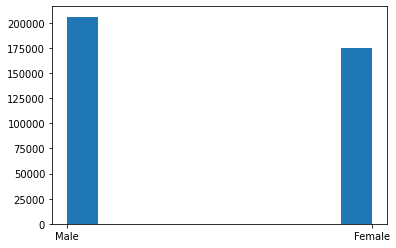

In [ ]:
printHistogram(insurance_data,1)

Age


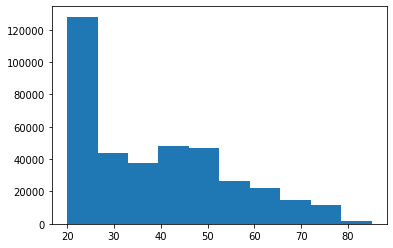

In [ ]:
printHistogram(insurance_data,2)

Driving_License


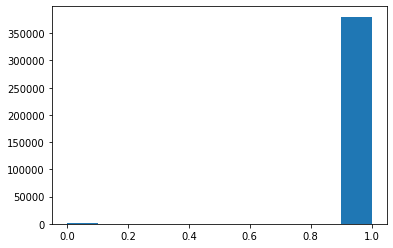

In [ ]:
printHistogram(insurance_data,3)

Region_Code


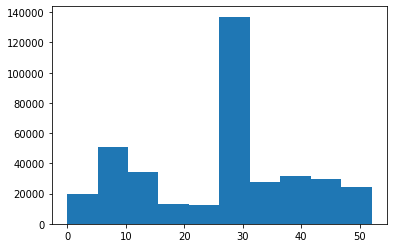

In [ ]:
printHistogram(insurance_data,4)

Previously_Insured


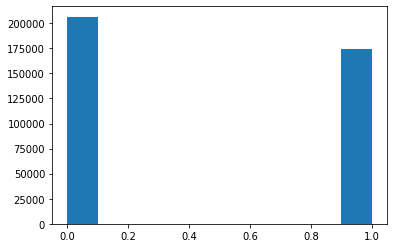

In [ ]:
printHistogram(insurance_data,5)

Vehicle_Age


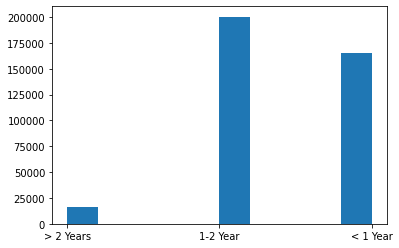

In [ ]:
printHistogram(insurance_data,6)

Vehicle_Damage


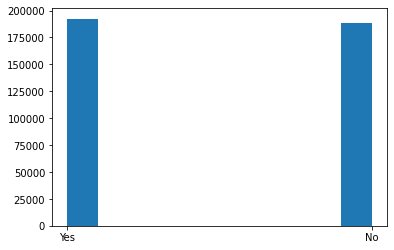

In [ ]:
printHistogram(insurance_data,7)

Annual_Premium


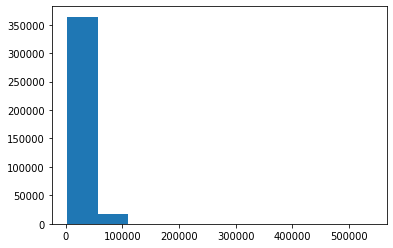

In [ ]:
printHistogram(insurance_data,8)

Policy_Sales_Channel


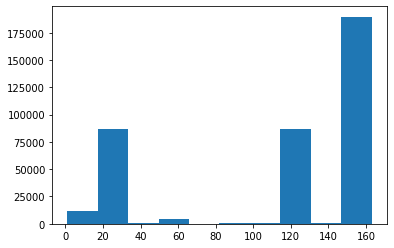

In [ ]:
printHistogram(insurance_data,9)

Vintage


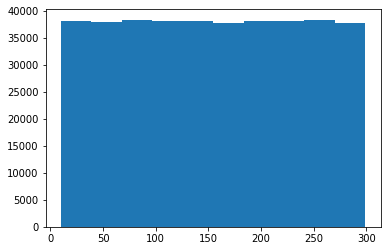

In [ ]:
printHistogram(insurance_data,10)

Response


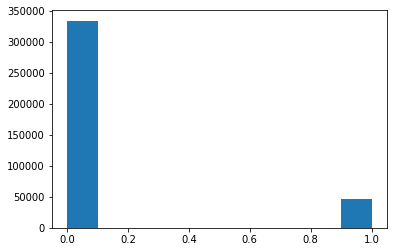

In [ ]:
printHistogram(insurance_data,11)

# Clean up the data

- ID: No use
-	Gender (2): Male (1), Female (0)
-	Age (4): 20 - 25, 26-40, 41-60, 61-
-	Driving_License (2): 0 (No DL), 1 (DL)
-	Region_Code (3): 0-15, 26-30, 31-40, 41-
-	Previous_Insured (2): 1 (Yes), 0 (No)
-	Vehicle Age (3): 0 (< 1 year), 1 (1-2 year), 2 (> 2 year)
-	Vehicle_damage (2): 1(yes), 0 (No)
-	Anual_Premium (4): 0-20000, 20000-35000, 35000-45000, 45000-
-	PolicySalesChannel (3):  0-35, 36-130, 130-
-	Vintage (3): 0 -100, 100-200, 200-300 


In [ ]:
# Drop the id column
insurance_data = insurance_data.drop('id', axis=1)

In [ ]:
insurance_data.shape
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


## Age

In [ ]:
insurance_data['Age'] = np.where(insurance_data['Age'].between(0,25,inclusive=True), 1, insurance_data['Age'])
insurance_data['Age'] = np.where(insurance_data['Age'].between(26,40,inclusive=True), 2, insurance_data['Age'])
insurance_data['Age'] = np.where(insurance_data['Age'].between(41,60,inclusive=True), 3, insurance_data['Age'])
insurance_data['Age'] = np.where(insurance_data['Age'].between(61,100,inclusive=True), 4, insurance_data['Age'])
#print (insurance_data['Age'])
print (np.unique(insurance_data['Age'],return_counts=True))

(array([1, 2, 3, 4]), array([114505, 102119, 121246,  43239]))


In [ ]:
insurance_data['Age'] = np.where(insurance_data['Age']== 1, '< 26', insurance_data['Age'])
insurance_data['Age'] = np.where(insurance_data['Age']=='2', '26-40', insurance_data['Age'])
insurance_data['Age'] = np.where(insurance_data['Age']=='3', '41-60', insurance_data['Age'])
insurance_data['Age'] = np.where(insurance_data['Age']=='4', '> 60', insurance_data['Age'])
#print (insurance_data['Age'])
print (np.unique(insurance_data['Age'],return_counts=True))

(array(['26-40', '41-60', '< 26', '> 60'], dtype=object), array([102119, 121246, 114505,  43239]))


In [ ]:
def cleanUpData(myData): 
    # Region_Code
    myData['Region_Code'] = np.where(myData['Region_Code'].between(0,25), 0, myData['Region_Code'])
   # myData['Region_Code'].replace({1, "0-25"})
    myData['Region_Code'] = np.where(myData['Region_Code'].between(25,30), 1, myData['Region_Code'])
    myData['Region_Code'] = np.where(myData['Region_Code'].between(30,40), 2, myData['Region_Code'])
    myData['Region_Code'] = myData['Region_Code'].mask(myData['Region_Code'] > 40, 3)
    
    # Annual_Premium
    myData['Annual_Premium'] = np.where(myData['Annual_Premium'].between(0,20000), 0, myData['Annual_Premium'])
    myData['Annual_Premium'] = np.where(myData['Annual_Premium'].between(20000,35000), 1, myData['Annual_Premium'])
    myData['Annual_Premium'] = np.where(myData['Annual_Premium'].between(35000,45000), 2, myData['Annual_Premium'])
    myData['Annual_Premium'] = myData['Annual_Premium'].mask(myData['Annual_Premium'] > 45000, 3)
    
    # Policy_Sales_Channel
    myData['Policy_Sales_Channel'] = np.where(myData['Policy_Sales_Channel'].between(0,35), 0, myData['Policy_Sales_Channel'])
    myData['Policy_Sales_Channel'] = np.where(myData['Policy_Sales_Channel'].between(35,130), 1, myData['Policy_Sales_Channel'])
    myData['Policy_Sales_Channel'] = myData['Policy_Sales_Channel'].mask(myData['Policy_Sales_Channel'] > 130, 2)
    
    # Vintage
    myData['Vintage'] = np.where(myData['Vintage'].between(0,100), 0, myData['Vintage'])
    myData['Vintage'] = np.where(myData['Vintage'].between(100,200), 1, myData['Vintage'])
    myData['Vintage'] = myData['Vintage'].mask(myData['Vintage'] > 200, 2)

In [ ]:
cleanUpData(insurance_data)
print(insurance_data)
insurance_data.info()

        Gender    Age  Driving_License  ...  Policy_Sales_Channel  Vintage Response
0         Male  41-60                1  ...                   0.0        2        1
1         Male   > 60                1  ...                   0.0        1        0
2         Male  41-60                1  ...                   0.0        0        1
3         Male   < 26                1  ...                   2.0        2        0
4       Female  26-40                1  ...                   2.0        0        0
...        ...    ...              ...  ...                   ...      ...      ...
381104    Male   > 60                1  ...                   0.0        0        0
381105    Male  26-40                1  ...                   2.0        1        0
381106    Male   < 26                1  ...                   2.0        1        0
381107  Female   > 60                1  ...                   1.0        0        0
381108    Male  41-60                1  ...                   0.0        2  

(array([121246.,      0.,      0.,  43239.,      0.,      0., 114505.,
             0.,      0., 102119.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

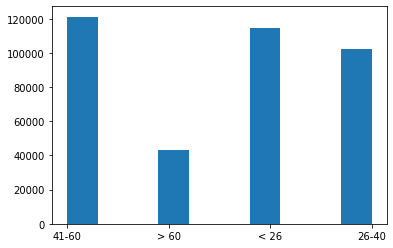

In [ ]:
plt.hist(insurance_data['Age'])

# Split the original data set into training set and testing set

In [ ]:
def split_train_test(data_frame, test_size):
   """
        Splitting the data frame by training data and test data
    Parameters
    ----------
    df : data Frame
        Original Data that need to split by training data and testing data.
    test_size : percent of original data
        Percent in decimal number such as 0.5 for 50%, 0.2 for 20%. 
        It means that there are 20% test data.

    Returns
    -------
    train_df : data Frame
        trainning data set.
    test_df : data Frame
        testing data set.

    """
   number_test_indices = round(test_size * len(data_frame))
    # pick random test indices from orginal data 
   test_indices = random.sample(population=data_frame.index.tolist(), k=number_test_indices)
   test_df = data_frame.loc[test_indices]  # get the test data 
   train_df = data_frame.drop(test_indices) # get the training data 

   return train_df, test_df

In [ ]:
training_set, testing_set  = split_train_test(insurance_data, 0.9)

In [ ]:
printDataInformation(training_set)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38111 entries, 8 to 381104
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                38111 non-null  object 
 1   Age                   38111 non-null  object 
 2   Driving_License       38111 non-null  int64  
 3   Region_Code           38111 non-null  float64
 4   Previously_Insured    38111 non-null  int64  
 5   Vehicle_Age           38111 non-null  object 
 6   Vehicle_Damage        38111 non-null  object 
 7   Annual_Premium        38111 non-null  float64
 8   Policy_Sales_Channel  38111 non-null  float64
 9   Vintage               38111 non-null  int64  
 10  Response              38111 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.5+ MB


In [ ]:
printDataInformation(testing_set)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342998 entries, 365485 to 120665
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                342998 non-null  object 
 1   Age                   342998 non-null  object 
 2   Driving_License       342998 non-null  int64  
 3   Region_Code           342998 non-null  float64
 4   Previously_Insured    342998 non-null  int64  
 5   Vehicle_Age           342998 non-null  object 
 6   Vehicle_Damage        342998 non-null  object 
 7   Annual_Premium        342998 non-null  float64
 8   Policy_Sales_Channel  342998 non-null  float64
 9   Vintage               342998 non-null  int64  
 10  Response              342998 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 31.4+ MB


# Decision Tree Implementation start here

In [ ]:
def shannonEntropy (target_list):
    """
    
    Shannon's entropy of target_list, target variable is Response
    
    Parameters
    ----------
    target_list : list
        Column of target variable or feature variable 

    Returns
    -------
    float
        Shannon's Entropy of target list.

    """
    total = len(target_list) #count total number in response list
    # Get the level of response list and counter of each
    levels, count = np.unique(target_list, return_counts=True)
   #print (levels)
    #print (count)
    # Calculate the probability of each level in target variable
    probability_each_level = count / total
   # print(probability_each_level)
    entropy = 0
    for i in probability_each_level:
        entropy += i * math.log(i,2)
    
    #print(-entropy )
    return -entropy

In [ ]:
print(shannonEntropy(training_set['Response']))

0.5376515339986694


In [ ]:
def remaining_Entropy(data, feature):
    """
    Calculate remaininig entropy of the given features in data.
    Parameters
    ----------
    data : data frame
        Data that contain feature and target variable column.
    feature : list 
        feature column .

    Returns
    -------
    rem : float
        Entropy remaining of feature variable

    """
    feature_levels, feature_count = np.unique(data[feature], return_counts=True)
    #print (feature_levels)
    #print (feature_count)
    partition_entropy = []
    for i in range(len(feature_levels)):
        partition_entropy.append( shannonEntropy(data.where(data[feature] == feature_levels[i]).dropna()['Response']))
    rem = 0
    for i in range(len(feature_levels)):
        rem += feature_count[i] / np.sum(feature_count) * partition_entropy[i]
   
    #print (rem)
    return rem

In [ ]:
remaining_Entropy(training_set, 'Gender')

0.5356701416443791

In [ ]:
def information_Gain(data, feature):
    """
    Return the information gain of the feature in the data frame, target variable is Response
    Parameters
    ----------
    data : data frame
        Data .
    feature : list
        Feature column.

    Returns
    -------
    float
        information gain of the given feature in the data.

    """
    
    return shannonEntropy(data['Response']) - remaining_Entropy(data, feature) 


In [ ]:
print(information_Gain(training_set, 'Gender'))

0.00198139235429029


In [ ]:
def is_unique_instance(data):
   if len(np.unique(data['Response'])) == 1:
      return True
   else:
      return False

In [ ]:
print(is_unique_instance(training_set))

False


In [ ]:
def find_best_features(data, features_list):
   """
   
   Parameters
   --------------------
   data: data frame
     data 
   features_list: list 
      contains all the features name

   Returns
   --------------
   best_feature: string
      name of the best features in the list
   """
   igain = -1
   best_feature = ''
   for i in features_list:
      igain_i = information_Gain(data, i)
      if igain < igain_i:
         igain = igain_i
         best_feature = i
   
   return best_feature

In [ ]:
print(find_best_features(training_set, training_set.columns[:-1]))
# need to clearn up data first

Previously_Insured


In [ ]:
def ID3(data,originaldata,features,target_attribute_name="Response",parent_node_class = None):
    
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    #If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    #If the feature space is empty, return the mode target feature value of the direct parent node --> Note that

    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        #Select the feature which best splits the dataset
        item_values = [information_Gain(data,feature) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information
        #gain in the first run
        tree = {best_feature:{}}
        
        
        #Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != best_feature]
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the ID3 algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = ID3(sub_data,insurance_data,features,target_attribute_name,parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return(tree)

In [ ]:
def predict(query,tree,default = 1):
    #1.
    for key in list(query.keys()):
        if key in list(tree.keys()):
            #2.
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            #3.
            result = tree[key][query[key]]
            #4.
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

In [ ]:
def test(data,tree):
    #Create new query instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "Response")
    
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    #predicted = pd.DataFrame(columns=["predicted"]) 
    predicted =[]
    #Calculate the prediction accuracy
    for i in range(len(data)):
       # predicted[.loc[i,"predicted"]] = predict(queries[i],tree,1.0) 
        #print(predict(queries[i],tree,0.0) )
        predicted.append(predict(queries[i],tree,1.0) )
    #print(predicted["predicted"])
    #predicted.info()
    
    return predicted

In [ ]:
tree = ID3(training_set,training_set,training_set.columns[:-1])

In [ ]:
pprint(tree)

TypeError: ignored

In [ ]:
#training_set, testing_set  = split_train_test(insuranceData, 0.98)
predicts = test(testing_set,tree)
total = 0
for i in range(len(predicts)):
    total = total + predicts[i]
print(total)

In [ ]:
def calPercentAccurate(pred_list, actual_list):
    accurate = 0
    for i in range(len(pred_list)):
        if pred_list[i] == actual_list[i]:
            accurate = accurate + 1
    
    return accurate / len(pred_list)

In [ ]:
print ()
actual = testing_set[testing_set.columns[-1]]
print(type(predict))
actualFrame = pd.DataFrame(actual)
#print (predict, ' ', actualFrame)
#print(predict[0], ' ', actualFrame[0])

#predict_list = predicts.values.tolist()
actual_list = actualFrame.values.tolist()
#print(predict_list[0] == actual_list[0])

In [ ]:
#print( calPercentAccurate(predict_list,actual_list ))
#print(len(actual))
#print(len(predicts))
#print('actual list ' ,type( actual_list))
#type(predicts)

In [ ]:
def dt_confusion_matrix(test, predictions):
    tp=0
    fp=0
    fn=0
    tn=0
    correct = 0
    for i in range(len(test)):
        if test[i] == predictions[i]:
            correct += 1

    for i in range(len(test)):
        if test[i] == 0:
            if predictions[i] == 0:
                tp += 1
            else:
                fp += 1
        else:
            try:

                if predictions[i] == 0:
                    fn += 1
                else:
                    tn += 1
            except:
                print("culprit",predictions)

    print("Confusion matrix \n True Positive    False Negative")
    print(f"    {tp}                {fn}")
    print("False Positive    True Negative")
    print(f"    {fp}                {tn}")

    print("Accuracy",(tp+tn)/len(test))
    print("Error Rate",(1 - (tp+tn)//len(test) ))

    recall= tp/(tp+fn)
    precision = tp/(tp+fp)

    F1= 2*(recall*precision)/(recall+precision)
    print("F1",F1)
    return (correct / float(len(test))) * 100.0

In [ ]:
dt_confusion_matrix(actual_list, predicts)

# K-nearest Neighbor start here

KNN Implementation

In [ ]:
def train_test_split(attributes, labels, testSize):
  # randomize attributes and labels
  length = len(attributes)
  indexes = np.arange(length)
  np.random.shuffle(indexes)
  
  shuffledAttributes = attributes[indexes]
  shuffledLabels = labels[indexes]

  # split into training and testing
  position = length - round(length / (1 / testSize))

  trainData = attributes[0:position]
  testData = attributes[position:length]
  trainLabels = labels[0:position]
  testLabels = labels[position:length]

  return trainData, testData, trainLabels, testLabels

def euclideanDistance(testData, trainData):
  distance = float(0)

  for i in range(len(testData) - 1):
    distance += (testData[i] - trainData[i])**2

  return math.sqrt(distance)


def knnAlgo(testData, trainData, trainLabels, k):
    predictedLabels = []   # predicted labels
    distance = []
    testLength = len(testData)
    trainLength = len(trainData)
    
    # determine predicted labels
    for i in range(testLength):
        # determine di
        for j in range(trainLength):
            distance.append((euclideanDistance(testData[i], trainData[i]), j))
        
        distance = sorted(distance)   # order distances from least to greatest
        KNN = distance[0:k]   # choose k closest neighbors
        KNNLength = len(KNN)
        distance = []
        labels = []

        for m in range(KNNLength):
            labels.append(trainLabels[KNN[m][1]])
        
        # determine the majority label
        majorityLabel = Counter(labels).most_common(1)[0][0]
                      
        predictedLabels.append(majorityLabel)
        
    return predictedLabels

Transform Data From Non-numerical To Numerical

In [ ]:
# Drop the id column
orig_insurance_data = orig_insurance_data.drop('id', axis = 1)

gender = {'Male': 1, 'Female': 0}
orig_insurance_data["Gender"] = orig_insurance_data["Gender"].map(gender)

orig_insurance_data['Age'] = np.where(orig_insurance_data['Age'].between(0,25,inclusive=True), 1, orig_insurance_data['Age'])
orig_insurance_data['Age'] = np.where(orig_insurance_data['Age'].between(26,40,inclusive=True), 2, orig_insurance_data['Age'])
orig_insurance_data['Age'] = np.where(orig_insurance_data['Age'].between(41,60,inclusive=True), 3, orig_insurance_data['Age'])
orig_insurance_data['Age'] = np.where(orig_insurance_data['Age'].between(61,100,inclusive=True), 4, orig_insurance_data['Age'])
orig_insurance_data['Age'] = np.where(orig_insurance_data['Age']== '< 26', 1, orig_insurance_data['Age'])
orig_insurance_data['Age'] = np.where(orig_insurance_data['Age']== '26-40', 2, orig_insurance_data['Age'])
orig_insurance_data['Age'] = np.where(orig_insurance_data['Age']== '41-60', 3, orig_insurance_data['Age'])
orig_insurance_data['Age'] = np.where(orig_insurance_data['Age']== '> 60', 4, orig_insurance_data['Age'])

vehicleAge = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
orig_insurance_data["Vehicle_Age"] = orig_insurance_data["Vehicle_Age"].map(vehicleAge)

vehicleDmg =  {'Yes': 1, 'No': 0}
orig_insurance_data["Vehicle_Damage"] = orig_insurance_data["Vehicle_Damage"].map(vehicleDmg)

Imbalance of Target Label

In [ ]:
attributes = orig_insurance_data[['Gender', 'Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage']]
labels = orig_insurance_data['Response']

sn.countplot("Response", data=orig_insurance_data)

Rebalance Target Label

In [ ]:
theSMOTE = SMOTE()
attributes, labels = theSMOTE.fit_resample(attributes, labels)

sn.countplot(labels)

Use KNN

In [ ]:
# define number of rows of dataset to examine
rows = 100000
attributes = attributes[0:rows]
labels = labels[0:rows]

# define test size and split into train and test
testSize = 0.3
trainData, testData, trainLabels, testLabels = train_test_split(attributes, labels, testSize)

# define number of neighbors and run knn algorithm
k = 21
predictedLabels = knnAlgo(testData, trainData, trainLabels, k)

KNN Confusion Matrix and Accuracy

In [ ]:
# confusion matrix function is taken from Anish's implementation below with minor changes
def knn_confusion_matrix(test, predictions):
    tp=0
    fp=0
    fn=0
    tn=0
    correct = 0
    for i in range(len(test)):
        if test[i] == predictions[i]:
            correct += 1

    for i in range(len(test)):
        if test[i] == 0:
            if predictions[i] == 0:
                tp += 1
            else:
                fp += 1
        else:
            try:

                if predictions[i] == 0:
                    fn += 1
                else:
                    tn += 1
            except:
                print("culprit",predictions)

    print("Confusion matrix \n True Positive    False Negative")
    print(f"    {tp}                {fn}")
    print("False Positive    True Negative")
    print(f"    {fp}                {tn}")

    print("Accuracy",(tp+tn)/len(test))
    print("Error Rate",(1 - (tp+tn)//len(test) ))

    recall= tp/(tp+fn)
    precision = tp/(tp+fp)

    F1= 2*(recall*precision)/(recall+precision)
    print("F1",F1)
    return (correct / float(len(test))) * 100.0

accuracy = knn_confusion_matrix(testLabels, predictedLabels)
print("Accuracy in  % is: ", accuracy)




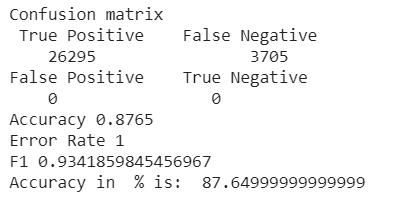

Naive Bayes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing library
import math
import random
import csv



# Encodes the non numeric variables
def encode_class(mydata, data_column):
    classes = []
    for i in range(0,len(mydata)):
        if mydata[i][data_column] not in classes:
            classes.append(mydata[i][data_column])
    for i in range(len(classes)):
        for j in range(0,len(mydata)):
            if mydata[j][data_column] == classes[i]:
                mydata[j][data_column] = i
    return mydata


def process_data(data):
    data = encode_class(data,1)  # Gender
    data = encode_class(data, 6) # Vehicle Age
    data = encode_class(data, 7) # Vehicle Damage

    for ite in range(0, len(data)):
        for jite in range(len(data[ite])):
            data[ite][jite]=float(data[ite][jite])

    return data


def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    # initally testset will have all the dataset  
    test = list(mydata)
    while len(train) < train_num:
        # index generated randomly from range 0  
        # to length of testset 
        index = random.randrange(len(test))
        # from testset, pop data rows and put it in train 
        train.append(test.pop(index))
    return train, test



def groupUnderClass(mydata):
    dict = {}
    for i in range(len(mydata)):
        if (mydata[i][11] not in dict):
            dict[mydata[i][11]] = []
        dict[mydata[i][11]].append(mydata[i])
    return dict

def mean(numbers):
    return sum(numbers) / float(len(numbers))


def std_dev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)

def MeanAndStdDev(mydata):
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
    # eg: list = [ [a, b, c], [m, n, o], [x, y, z]]
    # here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3
    # delete summaries of last class

    del info[-1]
    # for row in info:
    #     print(row)
    return info


def MeanAndStdDevForClass(mydata):
    info = {}
    dict = groupUnderClass(mydata)
    for classValue, instances in dict.items():
        info[classValue] = MeanAndStdDev(instances)
    return info


def calculateGaussianProbability(x, mean, stdev):
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo


def ClassProb(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            if std_dev ==0:
                std_dev = 0.1
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities


def predict(info, test):
    probabilities = ClassProb(info, test)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel


def getPredictions(info, test):
    predictions = []
    for i in range(len(test)):
        result = predict(info, test[i])
        predictions.append(result)
    return predictions



def confusion_matrix(test, predictions):
    tp=0
    fp=0
    fn=0
    tn=0
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == predictions[i]:
            correct += 1

    for i in range(len(test)):
        if test[i][-1] == 0:
            if predictions[i] == 0:
                tp += 1
            else:
                fp += 1
        else:
            try:

                if predictions[i] == 0:
                    fn += 1
                else:
                    tn += 1
            except:
                print("culprit",predictions)

    print("Confusion matrix \n True Positive    False Negative")
    print(f"    {tp}                {fn}")
    print("False Positive    True Negative")
    print(f"    {fp}                {tn}")

    print("Accuracy",(tp+tn)/len(test))
    print("Error Rate",(1 - (tp+tn)//len(test) ))

    recall= tp/(tp+fn)
    precision = tp/(tp+fp)

    F1= 2*(recall*precision)/(recall+precision)
    print("F1",F1)
    return (correct / float(len(test))) * 100.0



filename = '/content/drive/MyDrive/UCR_Courses/cs235_DataMining/Project/train.csv'


mydata = csv.reader(open(filename, "rt"))
mydata = list(mydata)
mydata = process_data(mydata[1:])


for i in range(1,len(mydata)):
    mydata[i] = [float(x) for x in mydata[i]]



ratio = 0.7
train_data, test_data = splitting(mydata, ratio)
print('Total number of examples are: ', len(mydata))
print('Out of these, training examples are: ', len(train_data))
print("Test examples are: ", len(test_data))


info = MeanAndStdDevForClass(train_data)

predictions = getPredictions(info, test_data)
accuracy = confusion_matrix(test_data, predictions)
print("Accuracy in  % is: ", accuracy)


## References

*   CS235 Lecture Slides and Recordings
*   https://sebastianraschka.com/faq/docs/lazy-knn.html
*   https://people.revoledu.com/kardi/tutorial/Similarity/EuclideanDistance.html
*   http://blog.xnextcon.com/?p=213
*   https://towardsdatascience.com/knn-k-nearest-neighbors-1-a4707b24bd1d
*   https://nbviewer.jupyter.org/gist/jwdink/9715a1a30e8c7f50a572
*   https://www.quora.com/How-can-I-choose-the-best-K-in-KNN-K-nearest-neighbour-classification
*   https://deepai.org/machine-learning-glossary-and-terms/kNN


